<a href="https://colab.research.google.com/github/MrSudhish/training-colab/blob/main/6%7C_KNN%2C_Navie_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#KNN
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
data= load_breast_cancer()
X=data.data
y=data.target

In [4]:
print(f"Dataset Loaded: {X.shape[0]} patients, {X.shape[1]} features each.")
print(f"Features names: {data.feature_names[:5]}")
print(f"Target names: {data.target_names}")

Dataset Loaded: 569 patients, 30 features each.
Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Target names: ['malignant' 'benign']


In [6]:
# 2.Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print(f"\nTraining KNN with k={k}....")


Training KNN with k=5....


In [13]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 94.74%


In [16]:
patient_index=10
new_patient = X_test[patient_index].reshape(1, -1)

In [18]:
new_patient_scaled = scaler.transform(new_patient)
prediction = knn.predict(new_patient_scaled)

In [19]:
prediction

array([1])

In [21]:
actual_diagnosis = y_test[patient_index]

In [22]:
actual_diagnosis

np.int64(1)

In [24]:
class_name= ['Malignant (cancer)', 'Bengin, (safe)']

In [28]:
print(f"New patient data (first 3 feature): {new_patient[0][:3]}...")
print(f"Predicted Diagnosis: {class_name[prediction[0]]}")
print(f"Actual Diagnosis: {class_name[actual_diagnosis]}")

if prediction[0] == actual_diagnosis:
    print("Prediction is correct.")
else:
    print("Prediction is incorrect.")

New patient data (first 3 feature): [-0.25698012  1.42326216 -0.32031902]...
Predicted Diagnosis: Bengin, (safe)
Actual Diagnosis: Bengin, (safe)
Prediction is correct.


In [31]:
#VISUALIZAITON
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification ,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

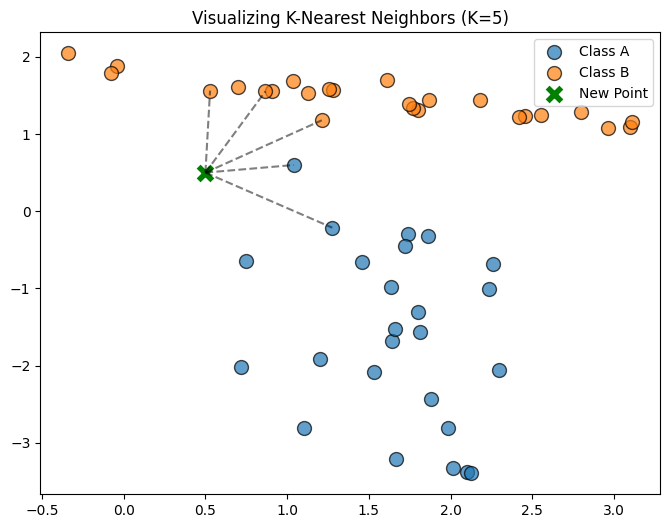

In [39]:
def plot_knn_mechanism():
      # Generate simple 2D data
      X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0,
      n_clusters_per_class=1, random_state=42, class_sep=1.5)

      new_point = np.array([[0.5, 0.5]]) # The "Unknown" point

      # Find neighbors
      k = 5
      knn = KNeighborsClassifier(n_neighbors=k)
      knn. fit(X, y)
      neighbors_indices = knn. kneighbors(new_point, return_distance=False) [0]

      plt.figure(figsize=(8, 6))
      plt.scatter(X[y == 0, 0], X[y == 0, 1], s=100, label='Class A', alpha=0.7, edgecolors='k' )
      plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, label='Class B', alpha=0.7, edgecolors='k' )
      plt.scatter(new_point[:, 0], new_point[:, 1], s=200, c='green', marker='X' , label='New Point', edgecolors='white' )

      # Draw lines connecting the new point to its neighbors
      for idx in neighbors_indices:
        plt.plot([new_point[0,0], X[idx, 0]], [new_point[0,1], X[idx, 1]], 'k--', alpha=0.5)

      plt.title(f"Visualizing K-Nearest Neighbors (K={k})")
      plt.legend()
      plt.show()

plot_knn_mechanism()

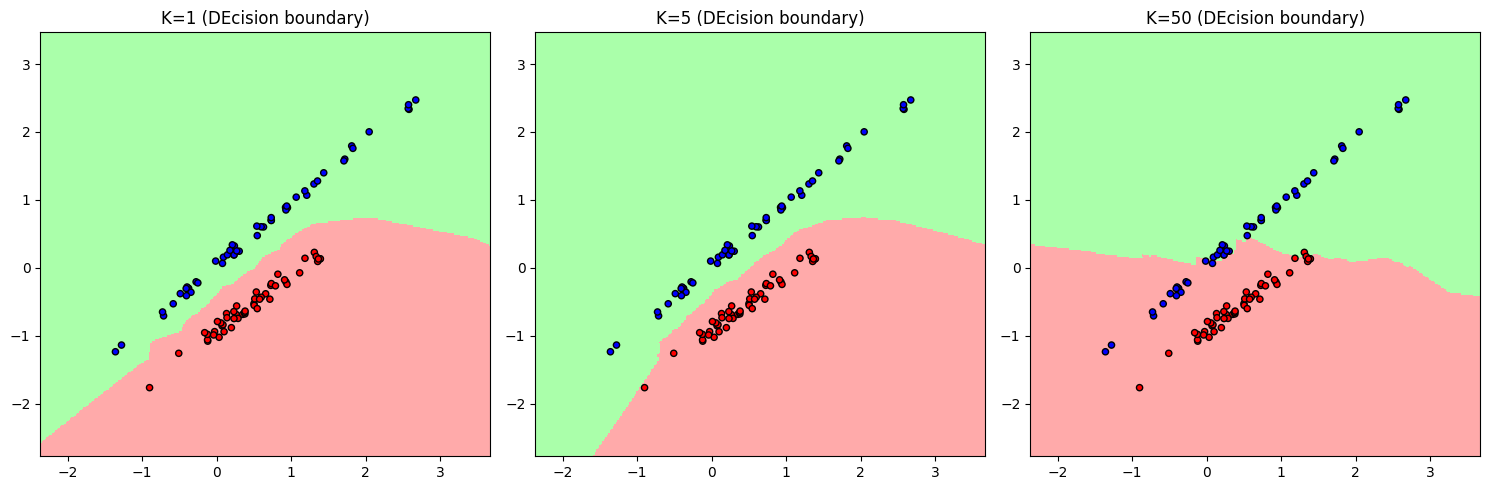

In [43]:
def plot_decision_boundaries():

  X,y=make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42, class_sep=0.5)
  cmap_light= ListedColormap(['#FFAAAA', '#AAFFAA'])
  cmap_bold= ListedColormap(['#FF0000', '#0000FF'])
  k_values=[1, 5, 50]

  plt.figure(figsize=(15, 5))

  for i, k in enumerate(k_values):
    clf= KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)


    x_min, x_max = X[:,0].min() -1, X[:,0].max()+1
    y_min, y_max = X[:,1].min() -1, X[:,1].max()+1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
    z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z=z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.pcolormesh(xx, yy, z, cmap=cmap_light, shading='auto')
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
    plt.title(f"K={k} (DEcision boundary)")

  plt.tight_layout()
  plt.show()

plot_decision_boundaries()

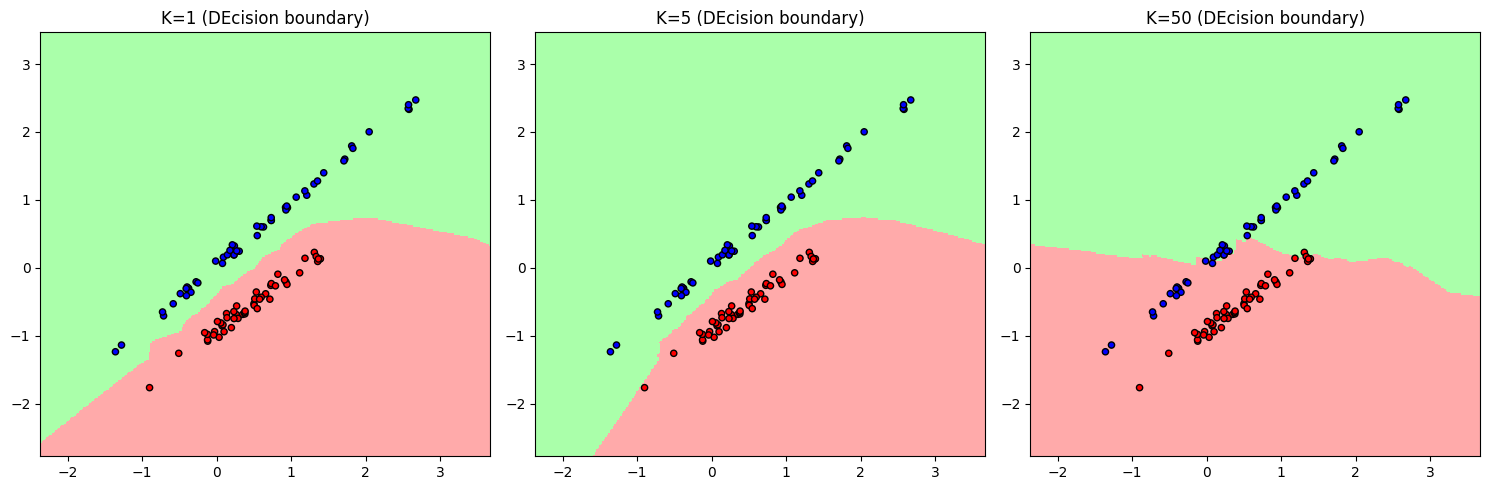

In [42]:
plot_decision_boundaries()

In [2]:
#GNB
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [4]:
#class 0: kindergarteners (Short & Light)
X_kinder = [[3.0, 30], [3.2, 35], [2.9, 28], [3.1, 32], [3.0, 31]]
y_kinder= [0]*5

In [8]:
#Class 1: NBA players (Tall & Heavy)
X_nba=[[6.9, 220], [6.5, 215], [7.1, 230], [6.8, 210], [6.7, 225]]
y_nba=[1]*5

In [9]:
X=np.array(X_kinder + X_nba)
y= np.array(y_kinder + y_nba)

In [11]:
model=GaussianNB()
model.fit(X,y)

GaussianNB()

In [13]:
print("___ what the model learned (the hills)_____")
print(f"class 0 (kindergarden) center: height={model.theta_[0][0]:.2f} ft, weight={model.theta_[0][1]:.2f} lbs")
print(f"class 1 (NBA players) center: height={model.theta_[1][0]:.2f} ft, weight={model.theta_[1][1]:.2f} lbs")
print("\n" + "="*40+"\n")

___ what the model learned (the hills)_____
class 0 (kindergarden) center: height=3.04 ft, weight=31.20 lbs
class 1 (NBA players) center: height=6.80 ft, weight=220.00 lbs




In [15]:
mystery_person = [[6.0, 180]]
probablities = model.predict_proba(mystery_person)

In [16]:
probablities

array([[0., 1.]])

In [18]:
print(f"----------PREDICTION MYSTERY PERSON: {mystery_person[0]}----------")
print(f"Class 0 (kindergarden) Probability: {probablities[0][0]*100:.9f}%")
print(f"Class 1 (NBA players) Probability: {probablities[0][1]*100:.9f}%")

----------PREDICTION MYSTERY PERSON: [6.0, 180]----------
Class 0 (kindergarden) Probability: 0.000000000%
Class 1 (NBA players) Probability: 100.000000000%


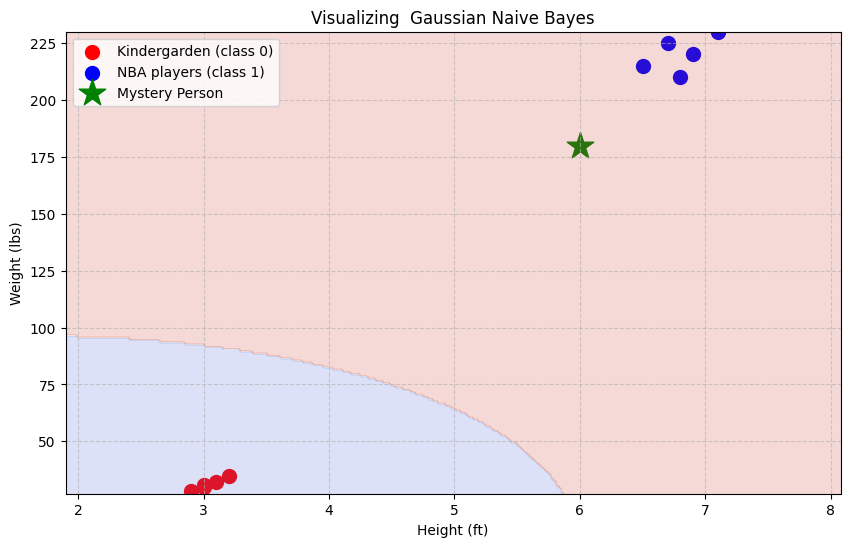

In [26]:
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported
plt.figure(figsize=(10,6))

# Convert X_kinder and X_nba to numpy arrays
X_kinder_arr = np.array(X_kinder)
X_nba_arr = np.array(X_nba)

#plot kindergarden in RED
plt.scatter(X_kinder_arr[:,0], X_kinder_arr[:,1], color='red', label='Kindergarden (class 0)', s=100)

#plot NBA players in Blue
plt.scatter(X_nba_arr[:,0], X_nba_arr[:,1], color='blue', label='NBA players (class 1)', s=100)
#testing person
plt.scatter(mystery_person[0][0], mystery_person[0][1], color='green', label='Mystery Person', s=400, marker='*')

#---STEP C: draw the decision boundry---
#this is the tricky part. we want to color the background red or blue
#to show which "Territory" belongs to which class
x_min, x_max = X[:,0].min() -1, X[:,0].max()+1
y_min, y_max = X[:,1].min() -1, X[:,1].max()+1
xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.02),
                   np.arange(y_min, y_max, 1))

#2. Ask the model to predict the class for every single point on this grid.
#this essentially asks: "if a person stood here, what would they be?"
Z= model.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)

#3. 'contourf fills the contour map with color.
# it colors the red zone ()
plt.contourf(xx,yy,Z,alpha=0.2,cmap=plt.cm.coolwarm)
plt.title("Visualizing  Gaussian Naive Bayes")
plt.xlabel("Height (ft)")
plt.ylabel("Weight (lbs)")
plt.legend(loc='upper left')
plt.grid(True,linestyle='--',alpha=0.6)

plt.show()

# EVALUATION **METRICES**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay

In [31]:
X, y = make_classification(n_samples=1000, n_features=10,
                          n_classes=2, weights=[0.9, 0.1], random_state=42)

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred= model.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

In [41]:
y_prob = model.predict_proba(X_test)[:,1]

In [42]:
y_prob

array([5.79495483e-02, 2.80057941e-02, 1.46595765e-01, 5.06643781e-01,
       7.91413870e-03, 7.07802779e-01, 4.43634417e-03, 1.13912265e-02,
       2.41187561e-02, 7.65454057e-02, 1.63612777e-02, 3.42253763e-02,
       1.44764682e-01, 4.44091225e-02, 2.59959031e-01, 1.44879191e-02,
       2.97796346e-02, 6.58979791e-02, 6.85502470e-03, 1.38966978e-02,
       7.38914918e-02, 6.85124707e-03, 4.76767591e-02, 3.75225808e-02,
       3.00816868e-02, 2.84420859e-02, 3.79687515e-01, 2.07638750e-02,
       2.09604927e-01, 2.40035584e-02, 1.66038337e-02, 4.16469947e-04,
       1.12693949e-02, 1.10208703e-02, 1.49467862e-02, 8.81977790e-02,
       4.82770376e-01, 2.85436423e-01, 1.22621260e-01, 3.63311877e-04,
       2.04439608e-02, 1.64864811e-02, 1.51455454e-01, 1.52547828e-02,
       3.90797663e-03, 6.51146657e-02, 9.49353217e-03, 2.22425250e-02,
       9.19893614e-03, 2.87641893e-02, 4.55867480e-02, 1.23379956e-02,
       8.58814140e-02, 3.54414980e-02, 2.51930596e-02, 6.08332378e-02,
      

In [44]:
print("### 1. confusion matrix ###")
cm=confusion_matrix(y_test, y_pred)
tn,fp,fn,tp=cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print("\n" + "-"*30+"\n")

### 1. confusion matrix ###
True Negatives: 169
False Positives: 6
False Negatives: 13
True Positives: 12

------------------------------



In [45]:
print(classification_report(y_test, y_pred, target_names=['healthy 0', 'sick 1']))
print("-"*30+"\n")

              precision    recall  f1-score   support

   healthy 0       0.93      0.97      0.95       175
      sick 1       0.67      0.48      0.56        25

    accuracy                           0.91       200
   macro avg       0.80      0.72      0.75       200
weighted avg       0.90      0.91      0.90       200

------------------------------



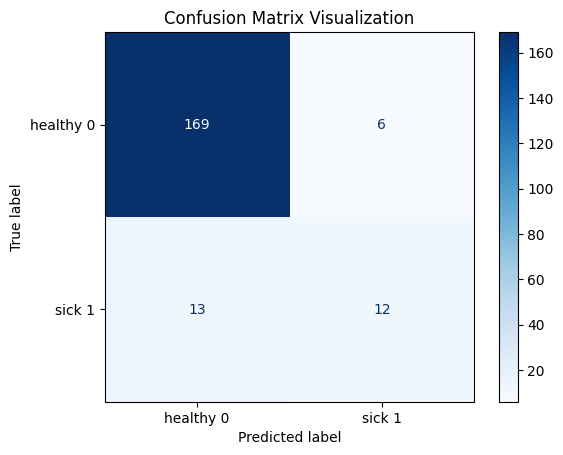

In [46]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['healthy 0', 'sick 1'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Visualization")
plt.show()